In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os, math, json # os for system, math for data processing and json for reading data
import numpy as np # for data processing
from matplotlib import pyplot as plt # for visualization
import tensorflow as tf # ML library
#import tensorflow.contrib.eager as tfe
print("Tensorflow version " + tf.__version__)
#tf.enable_eager_execution() # define by run is how models are build in pytorch (good practice). define and run (old way and slower) 
#AUTO = tf.data.experimental.AUTOTUNE # makes training faster

# for general operations
import sys # provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter
import os # provides a portable way of using operating system dependent functionality
import argparse # makes it easy to write user-friendly command-line interfaces
import inspect # provides several useful functions to help get information about live objects such as modules, classes, methods, functions, tracebacks, frame objects, and code objects
import gc # provides an interface to the optional garbage collector
import re # provides regular expression matching operations similar to those found in Perl

# for data operations
import random # implements pseudo-random number generators for various distributions
import numpy as np # numerical python
import pandas as pd # dataframes

# for time operations
import time # provides various time-related functions
import datetime # supplies classes for manipulating dates and times in both simple and complex ways

# for container data types
# collections => implements specialized container datatypes providing alternatives
from collections import Counter # for counting hashable objects

# file management
import shutil # offers a number of high-level operations on files and collections of files. support file copying and removal
from tqdm import tqdm # show a smart progress meter 

# Image management
# Python Imaging Library (PIL) adds image processing capabilities to your Python interpreter
from PIL import Image # provides a number of factory functions, including functions to load images from files, and to create new images
import cv2 # OpenCV. for image management

# Keras
import keras # high-level neural networks API
from keras.utils import np_utils # Numpy-related utilities
from keras.preprocessing.image import ImageDataGenerator # Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
from keras import models # provides number of methods and attributes
from keras.models import Model # given some input tensor(s) and output tensor(s)
from keras.models import Sequential # Configures the model for training. The Sequential model is a linear stack of layers. see https://keras.io/getting-started/sequential-model-guide/
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense 
                        # Conv2D - 2D convolution layer (e.g. spatial convolution over images).
                        # Activation - Applies an activation function to an output.
                        # MaxPooling2D - Max pooling operation for spatial data.
                        # Dropout - Applies Dropout to the input. Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.
                        # GlobalAveragePooling1D - Global average pooling operation for temporal data.
                        # GlobalAveragePooling2D - Global average pooling operation for spatial data
                        # Flatten - Flattens the input. Does not affect the batch size.
                        # BatchNormalization - Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
                        # Dense - Just your regular densely-connected NN layer.
# Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning
from keras.applications.inception_v3 import InceptionV3 # Inception V3 model, with weights pre-trained on ImageNet.
# Functions from the constraints module allow setting constraints (eg. non-negativity) on network parameters during optimization. The penalties are applied on a per-layer basis. 
from keras.constraints import maxnorm # Constrains the weights incident to each hidden unit to have a norm less than or equal to a desired value.
from keras import optimizers # An optimizer is one of the two arguments required for compiling a Keras model
from keras.optimizers import Adam, SGD , RMSprop # see https://keras.io/optimizers/
from keras import backend as K # What is a "backend"? https://keras.io/backend/#what-is-a-backend 
# callbacks - set of functions to be applied at given stages of the training procedure
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau # ModelCheckpoint - Save the model after every epoch
                                                                                           # EarlyStopping - Stop training when a monitored quantity has stopped improving
                                                                                           # TensorBoard - Allows you to visualize dynamic graphs of your training and test metrics, as well as activation histograms for the different layers in your model
                                                                                           # ReduceLROnPlateau - Reduce learning rate when a metric has stopped improving
# You can use Sequential Keras models (single-input only) as part of your Scikit-Learn workflow via the wrappers found at keras.wrappers.scikit_learn.py
# two available: 
# keras.wrappers.scikit_learn.KerasClassifier(build_fn=None, **sk_params), which implements the Scikit-Learn classifier interface,
# keras.wrappers.scikit_learn.KerasRegressor(build_fn=None, **sk_params), which implements the Scikit-Learn regressor interface. 
from keras.wrappers.scikit_learn import KerasClassifier # implements the Scikit-Learn classifier interface

# Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report 
                            # precision_score - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
                                              # The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.
                            # recall_score - The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
                                              # The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.
                            # f1_score - The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 
                                              # The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)
                            # roc_auc_score - Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
                                              # Note: this implementation is restricted to the binary classification task or multilabel classification task in label indicator format.
                            # confusion_matrix - to evaluate the accuracy of a classification. see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
                            # classification_report - Build a text report showing the main classification metrics

# TensorFlow
# end-to-end open source platform for machine learning
#from __future__ import absolute_import, division, print_function, unicode_literals

#import tensorflow as tf
#print(tf.__version__)
#tf.enable_eager_execution() # define by run is how models are build in pytorch (good practice). define and run (old way and slower) 

# for visualization
from IPython.display import display # display in cells
import seaborn as sns # visualization library
from matplotlib.pyplot import figure # Create a new figure
import matplotlib.pyplot as plt # object-oriented API is recommended for more complex plots
import matplotlib.image as mpimg # basic image loading, rescaling and display operations.
from mlxtend.plotting import plot_confusion_matrix # A function for plotting decision regions of classifiers in 1 or 2 dimensions

# setting values
K.image_data_format() # affects how each of the backends treat the data dimensions when working with multi-dimensional convolution layers (such as Conv2D, Conv3D, Conv2DTranspose, Copping2D, … and any other 2D or 3D layer). 
                      # Specifically, it defines where the 'channels' dimension is in the input data. Both TensorFlow and Theano expects a four dimensional tensor as input. 
                      # But where TensorFlow expects the 'channels' dimension as the last dimension (index 3, where the first is index 0) of the tensor – i.e. tensor with shape (samples, rows, cols, channels) 
                      # Theano will expect 'channels' at the second dimension (index 1) – i.e. tensor with shape (samples, channels, rows, cols). 
                      # The outputs of the convolutional layers will also follow this pattern.

%matplotlib inline

Tensorflow version 1.14.0


Using TensorFlow backend.


In [3]:
# To get the image_data_format, you can use the image_data_format() function
#print(K.image_data_format())
# To set the image_data_format, pass the string either ‘channels_first’ or ‘channels_last’ to set_image_data_format() function
# K.set_image_data_format('channels_first') # for Theano
K.set_image_data_format('channels_last')  # for TensorFlow and CNTK
print(K.image_data_format())
print(K.backend())

channels_last
tensorflow


In [4]:
# moving to the colab notebook folder
%cd '/content/drive/My Drive/Colab Notebooks' 

/content/drive/My Drive/Colab Notebooks


In [0]:
# Creates directory, if directory exists removes if remove parameter is set to True 
def create_directory(directory_path, remove=False):
    if remove and os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
            os.mkdir(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
    else:
        try:
            os.mkdir(directory_path)
        except:
            print("Could not create directory: ", directory_path)
            return False
        
    return True

# Removes directory, if directory exists 
def remove_directory(directory_path):
    if os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
        except:
            print("Could not remove directory : ", directory_path)
            return False
        
    return True

def clear_directory(directory_path):
    dirs_files = os.listdir(directory_path)
    
    for item in dirs_files:
#         item_path = os.path.join(directory_path, item)
        item_path = directory_path+ item
        
        try:
            if os.path.isfile(item_path):
                os.unlink(item_path)
            elif os.path.isdir(item_path): 
                shutil.rmtree(item_path)
        except Exception as e:
            print(e)
            
    return True


def remove_empty_folders(path, removeRoot=True):
    if not os.path.isdir(path):
        return
    
    # remove empty subfolders
    files = os.listdir(path)
    
    if len(files):
        for f in files:
            fullpath = os.path.join(path, f)
            
            if os.path.isdir(fullpath):
                remove_empty_folders(fullpath)

    # if folder empty, delete it
    files = os.listdir(path)
    
    if len(files) == 0 and removeRoot:
        print("Removing empty folder:", path)
        os.rmdir(path)
        
        
def dir_file_count(directory):
    return sum([len(files) for r, d, files in os.walk(directory)])

In [0]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()
        

In [0]:
# prints a integer for degugging
def debug(x):
    print("-"*40, x, "-"*40)

In [0]:
# Removes everything except alphabetical and selected characters from name string
def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

In [0]:
def get_reset_subplot_params(nrows, ncols, dpi):
    subplot_params = {}
    subplot_params["nrows"] = nrows
    subplot_params["ncols"] = ncols

    subplot_params["figsize_col"] = subplot_params["ncols"]*2.5
    subplot_params["figsize_row"] = subplot_params["nrows"]*2.5
    subplot_params["dpi"] = dpi
    subplot_params["facecolor"] = 'w'
    subplot_params["edgecolor"] = 'k'
    subplot_params["subplot_kw"] = {'xticks': [], 'yticks': []}
    subplot_params["axes.titlesize"] = 'small'
    subplot_params["hspace"] = 0.5
    subplot_params["wspace"] = 0.3
    
    return subplot_params

def get_reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params

In [0]:
def select_image_by_category(image_dir, image_count_per_category):
    classes = os.listdir(image_dir)
    class_count = len(classes)

    image_file_paths = {}
    
    for i in range(class_count):
        subdir_path = image_dir+"/"+classes[i]
        subdir_files = os.listdir(subdir_path)

        subdir_file_count = len(subdir_files)

        subdir_file_mem = {}
        
        subdir_file_index = -1
        
        image_file_paths[classes[i]] = []
        
        for j in range(image_count_per_category):
            while subdir_file_index in subdir_file_mem:
                subdir_file_index = random.randint(0, subdir_file_count-1)
                
            subdir_file_mem[subdir_file_index] = 1
            
            subdir_file_name = subdir_files[subdir_file_index]
            subdir_file_path = subdir_path+ "/" + subdir_file_name

            image_file_paths[classes[i]].append(subdir_file_path)
            
    return image_file_paths


def get_fig_axs(subplot_params):
    fig, axs = plt.subplots(
        nrows=subplot_params["nrows"], ncols=subplot_params["ncols"], 
        figsize=(subplot_params["figsize_col"], subplot_params["figsize_row"]),
        dpi=subplot_params["dpi"], facecolor=subplot_params["facecolor"], 
        edgecolor=subplot_params["edgecolor"], subplot_kw=subplot_params["subplot_kw"])
        
    return fig, axs
    

def plot_sample_image(image_file_paths, plot_params, subplot_params, update_image=True):
    fig, axs = get_fig_axs(subplot_params)

    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])


    i=0
    for img_filepath in image_file_paths:
        img = cv2.imread(img_filepath, 1)
        plt.title(img_filepath.split("/")[-1])
        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        plt.imshow(img)
        
        plt.xticks([])
        plt.yticks([])
        
        i=i+1
        
    if plot_params["update_image"] and os.path.exists(plot_params["image_file_name"]):
        os.remove(plot_params["image_file_name"])  
    if plot_params["save"]:
        fig.savefig(plot_params["image_file_name"], dpi=plot_params["dpi"])
        
    plt.tight_layout()
    plt.show()
    
    
def show_class_sample_images(directory, image_count_per_category=5, save=False, dpi=100, update_image=False):
    class_count = len(os.listdir(directory))
    print("Number of Classes: ", class_count)
    sample_img_by_class = select_image_by_category(directory, image_count_per_category)
    for class_name in sample_img_by_class:
        plot_params = get_reset_plot_params(image_file_name="img.png", save = save, dpi=dpi, update_image=update_image)
        subplot_params = get_reset_subplot_params(nrows=1, ncols=image_count_per_category, dpi=dpi)
        print("%s%s%s"%("-"*55, name_correct(class_name), "-"*55))
        plot_sample_image(sample_img_by_class[class_name], plot_params, subplot_params)
        print("")
    print("%s%s%d%s"%("-"*55, "All Classes Printed:", class_count, "-"*55))

In [0]:
# count number of files in each subdirectory of a directory
def subdirectory_file_count(master_directory):
    subdirectories = os.listdir(master_directory)
    subdirectory_count = len(subdirectories)

    subdirectory_names = []
    subdirectory_file_counts = []

    for subdirectory in subdirectories:
        current_directory = os.path.join(master_directory, subdirectory)
        file_count = len(os.listdir(current_directory))
        subdirectory_names.append(subdirectory)
        subdirectory_file_counts.append(file_count)
    
    return subdirectory_names, subdirectory_file_counts
         
    

# show barplot
def bar_plot(x, y, plot_property):
    if plot_property['subplot']:
        plt.subplot(plot_property['subplot'])
    sns.barplot(x=x, y=y)
    plt.title(plot_property['title'], fontsize=plot_property['title_fontsize'])
    plt.xlabel(plot_property['xlabel'], fontsize=plot_property['label_fontsize'])
    plt.ylabel(plot_property['ylabel'], fontsize=plot_property['label_fontsize'])
    plt.xticks(range(len(x)), x)
    
# show bar plot for count of labels in subdirectory of a directory
def count_bar_plot(master_directory, plot_property):
    dir_name, dir_file_count = subdirectory_file_count(master_directory)
    x = [name_correct(i) for i in dir_name]
    # x = dir_name
    y = dir_file_count
    bar_plot(x, y, plot_property)
    
    
# show bar plot for count of labels in subdirectory of a training, validation, testing directory    
def show_train_val_test(training_dir, validation_dir, testing_dir, plot_property):
    plt.figure(figsize=plot_property['figsize'])
    
    title = plot_property['title']
    plot_property['title'] = title + " (Training)"
    subplot_no = plot_property['subplot'] 

    count_bar_plot(training_dir, plot_property)
    
    
    plot_property['title'] = title + " (Validation)"
    plot_property['subplot'] = subplot_no+1
    count_bar_plot(validation_dir, plot_property)
    
    
    plot_property['title'] = title + " (Testing)"
    plot_property['subplot'] = subplot_no + 2
    count_bar_plot(testing_dir, plot_property)
    
    plt.show()

In [0]:
# reset tensorflow graph tp free up memory and resource allocation 
def reset_graph(model=None):
    if model:
        try:
            del model
        except:
            return False
    
    tf.compat.v1.reset_default_graph() # Clears the default graph stack and resets the global default graph
    
    K.clear_session()
    
    gc.collect()
    
    return True


# reset callbacks 
def reset_callbacks(checkpoint=None, reduce_lr=None, early_stopping=None, tensorboard=None):
    checkpoint = None
    reduce_lr = None
    early_stopping = None
    tensorboard = None

In [13]:
reset_graph() 
reset_callbacks()

In [0]:
# Configure input/ output directory
# Configure training, validation, testing directory

input_directory = r"data/input/"
output_directory = r"data/output/"

training_dir = input_directory + r"train"
validation_dir = input_directory + r"val"
testing_dir = input_directory + r"test"


figure_directory = r"data/output/figures"

figure_directory = "data/output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)
    
    
file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"

Number of Classes:  2
-------------------------------------------------------Pneumonia-------------------------------------------------------


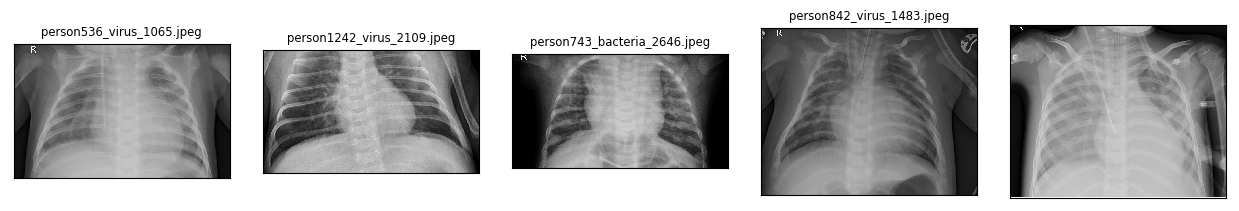


-------------------------------------------------------Normal-------------------------------------------------------


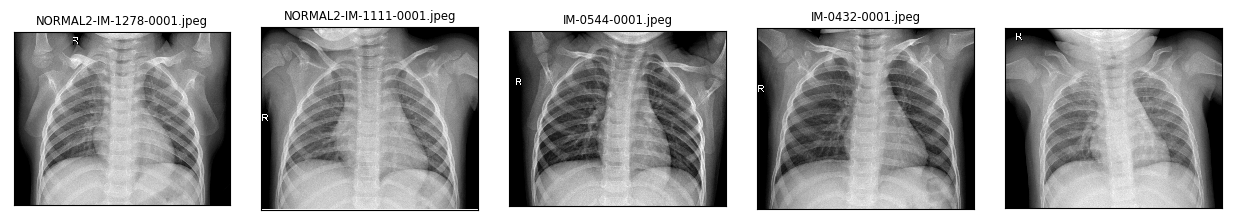


-------------------------------------------------------All Classes Printed:2-------------------------------------------------------


In [15]:
show_class_sample_images(training_dir, image_count_per_category=5, save=False, dpi=100, update_image=False)

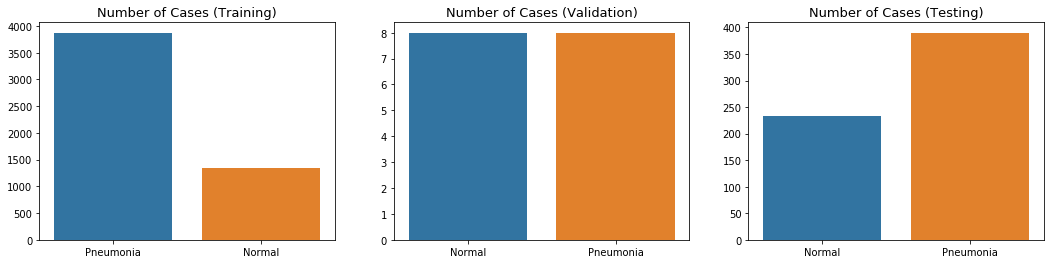

In [16]:
plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = "Number of Cases"

plot_params['subplot'] = 131

show_train_val_test(training_dir, validation_dir, testing_dir, plot_params)
classes = os.listdir(training_dir)
classes = [name_correct(i) for i in classes]

In [17]:
batch_size = 32

# target_size = (299, 299)
# color_mode = "rgb"


rescale = 1./255
target_size = (150, 150)
batch_size = 163
class_mode = "categorical"
# class_mode = "binary"


train_datagen = ImageDataGenerator(
    rescale=rescale,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size,
    shuffle=True)


validation_datagen = ImageDataGenerator(rescale=rescale)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=dir_file_count(validation_dir),
    shuffle = False)


test_datagen = ImageDataGenerator(rescale=rescale)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=dir_file_count(testing_dir),
    shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
# What is an unbalanced dataset? 
# unbalanced data refers to classification problems where we have unequal instances for different classes. 
# Having unbalanced data is actually very common in general, but it is especially prevalent when working with disease data where we usually have more healthy control samples than disease cases. 
# Even more extreme unbalance is seen with fraud detection, where e.g. most credit card uses are okay and only very few will be fraudulent.

from sklearn.utils import class_weight
def get_weight(y):
    class_weight_current =  class_weight.compute_class_weight('balanced', np.unique(y), y) # Estimate class weights for unbalanced datasets
                                                                                           # If ‘balanced’, class weights will be given by n_samples / (n_classes * np.bincount(y)). 
                                                                                           # If a dictionary is given, keys are classes and values are corresponding class weights. If None is given, the class weights will be uniform.
    return class_weight_current

In [19]:
class_weight = get_weight(train_generator.classes)
class_weight

array([1.9448173 , 0.67303226])

In [20]:
main_model_dir = output_directory + r"models/"
main_log_dir = output_directory + r"logs/"


clear_directory(main_log_dir)
remove_empty_folders(main_model_dir, False)


model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')

create_directory(model_dir, remove=True)
create_directory(log_dir, remove=True)

model_file = model_dir + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

Removing empty folder: data/output/models/2019-09-28 10-29-32


In [0]:
reset_graph()
reset_callbacks()

In [22]:
print("Settting Callbacks at ", date_time(1))

checkpoint = ModelCheckpoint(
    model_file, 
    monitor='val_acc', 
    save_best_only=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True)


tensorboard = TensorBoard(
    log_dir=log_dir,
    batch_size=batch_size,
    update_freq = 'batch')


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    cooldown=2,
    min_lr=0.0000000001,
    verbose=1)


#-----------------------------------------------------------------------------------------------------------------#
callbacks = [checkpoint, reduce_lr, early_stopping, tensorboard]
# callbacks = [checkpoint, tensorboard]
#-----------------------------------------------------------------------------------------------------------------#
print("Set Callbacks at ", date_time(1))

Settting Callbacks at  Timestamp: 2019-09-28 10:48:45
Set Callbacks at  Timestamp: 2019-09-28 10:48:47


In [0]:
# Load and configure model InceptionV3 for fine-tuning with TF + Keras

def get_model_2():
# get the pre-trained model
  
  #pretrained_model = InceptionV3(weights='imagenet', input_shape=(3,150,150), include_top=False)
  pretrained_model = tf.keras.applications.InceptionV3(input_shape=[*target_size, 3], include_top=False)
  pretrained_model.trainable = False # because I do not want to retrain those weights

  model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(), # flat vector (one dimentional) expected in Dense method
    tf.keras.layers.Dense(2, activation='softmax') # output probability values for class prediction
  ])

  model.compile(
    optimizer='adam',
    #loss = 'sparse_categorical_crossentropy',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
  )

  model.summary()

  return model

In [24]:
print("Base Model", date_time(1))
# model = get_model() # InceptionV3
# model = get_conv_model() # Custom DCN
model = get_model_2() # InceptionV3 with TF & Keras

Base Model Timestamp: 2019-09-28 10:48:58
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 36866     
Total params: 21,839,650
Trainable params: 36,866
Non-trainable params: 21,802,784
_________________________________________________________________


In [0]:
print("Starting Trainning Model", date_time(1))

steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

# lr = 0.00001
# optimizer=optimizers.Adam(lr=lr)

epochs = 30

#history = model.fit_generator(
#    train_generator,
#    steps_per_epoch = steps_per_epoch,
#    epochs=epochs,
#    verbose=2,
#    callbacks=callbacks,
#    validation_data=validation_generator,
#    validation_steps=validation_steps, 
#    class_weight=class_weight)

history = model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs,
                    validation_data=validation_generator, validation_steps=validation_steps, class_weight=class_weight) # fitting on our specific dataset training the model with my data

print("Completed Model Trainning", date_time(1))

In [25]:
dir_name = r"data/output/models/"
dirs = os.listdir(dir_name)
for i in range(len(dirs)):
    print(i, dirs[i])

0 model.h5
1 2019-09-28 10-48-39


In [26]:
cur_dir =dir_name
model_names = os.listdir(cur_dir)
for i in range(len(model_names)):
    print(i, model_names[i])

0 model.h5
1 2019-09-28 10-48-39


In [27]:
model_file = cur_dir+model_names[0]

print(model_file)

data/output/models/model.h5


In [29]:
model = tf.keras.models.load_model(model_file)

In [30]:
print("results")
result  = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)

print("%s%.2f  "% ("Loss     : ", result[0]))
print("%s%.2f%s"% ("Accuracy : ", result[1]*100, "%"))

results
1/1 [==============================] - 157s 157s/step - loss: 0.4959 - acc: 0.8622
Loss     : 0.50  
Accuracy : 86.22%


In [31]:
print("results")
y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)  
y_pred = y_pred.argmax(axis=-1)
y_true=test_generator.classes

results
1/1 [==============================] - 11s 11s/step


------------------------------------------------------------------------------------------
Derived Report
------------------------------------------------------------------------------------------
Precision     : 83.93%
Recall        : 96.41%
F1-Score      : 89.74%
------------------------------------------------------------------------------------------





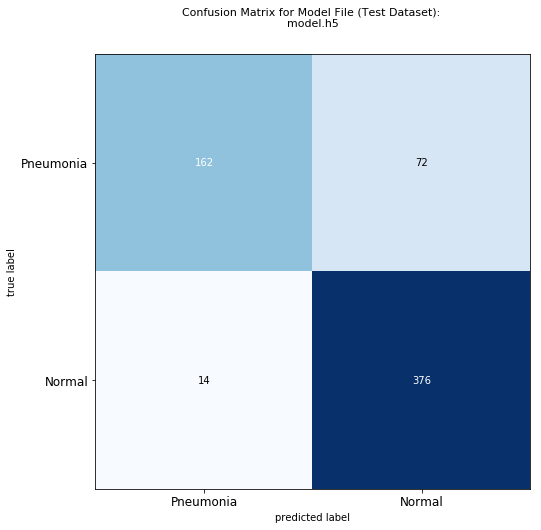




------------------------------------------------------------------------------------------
Report for Model File:  model.h5
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

   Pneumonia       0.92      0.69      0.79       234
      Normal       0.84      0.96      0.90       390

    accuracy                           0.86       624
   macro avg       0.88      0.83      0.84       624
weighted avg       0.87      0.86      0.86       624

------------------------------------------------------------------------------------------


In [32]:
image_file_name_CM = figure_directory+"/CM"

title = model_file.split("/")
model_title = "/".join([i for i in title[3:]])

precision = precision_score(y_true, y_pred) 
recall = recall_score(y_true, y_pred) 
f1 = f1_score(y_true, y_pred) 

print("-"*90)
print("Derived Report")
print("-"*90)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))
print("-"*90)
print("\n\n")

CM = confusion_matrix(y_true, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.title("Confusion Matrix for Model File (Test Dataset): \n"+model_title, fontsize=11)
fig.savefig(image_file_name_CM, dpi=100)
plt.show()
    

cls_report_print = classification_report(y_true, y_pred, target_names=classes)

cls_report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)

print("\n\n")
print("-"*90)
print("Report for Model File: ", model_title)
print("-"*90)
print(cls_report_print)
print("-"*90)

In [33]:
numofbatch = len(test_generator)

batch_no = random.randint(0, numofbatch-1)

y_img_batch, y_true_batch = test_generator[batch_no] 
y_true_batch = y_true_batch.argmax(axis=-1)

y_pred_batch = model.predict(y_img_batch)
y_pred_batch = y_pred_batch.argmax(axis=-1)


sizeofbatch = len(y_true_batch)
print("-"*35)
print("%s%d"%     ("Selected Batch No       : ", batch_no))
print("-"*35)
print("%s%d"%     ("Batch Size              : ", len(y_pred_batch)))
print("-"*35)
print("%s%.2f%s"% ("Accuracy                : ", np.mean(y_true==y_pred)*100, "%"))
print("-"*35)

-----------------------------------
Selected Batch No       : 0
-----------------------------------
Batch Size              : 624
-----------------------------------
Accuracy                : 86.22%
-----------------------------------


In [0]:
label_map = (test_generator.class_indices)
label_map_rev = {v: name_correct(k) for k,v in label_map.items()}

In [56]:
label_map_rev

{0: 'Normal', 1: 'Pneumonia'}

In [57]:
num_batch_t = len(validation_generator)
num = random.randint(0, num_batch_t-1)
num

0

In [58]:
y_img_batch, y_class_batch = validation_generator[num] 
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.06748466257668712


In [0]:
y_true_labels = [label_map_rev[c] for c in y_true]
y_pred_labels = [label_map_rev[c] for c in y_pred]

In [0]:
batch_size_t = len(y_true_labels)

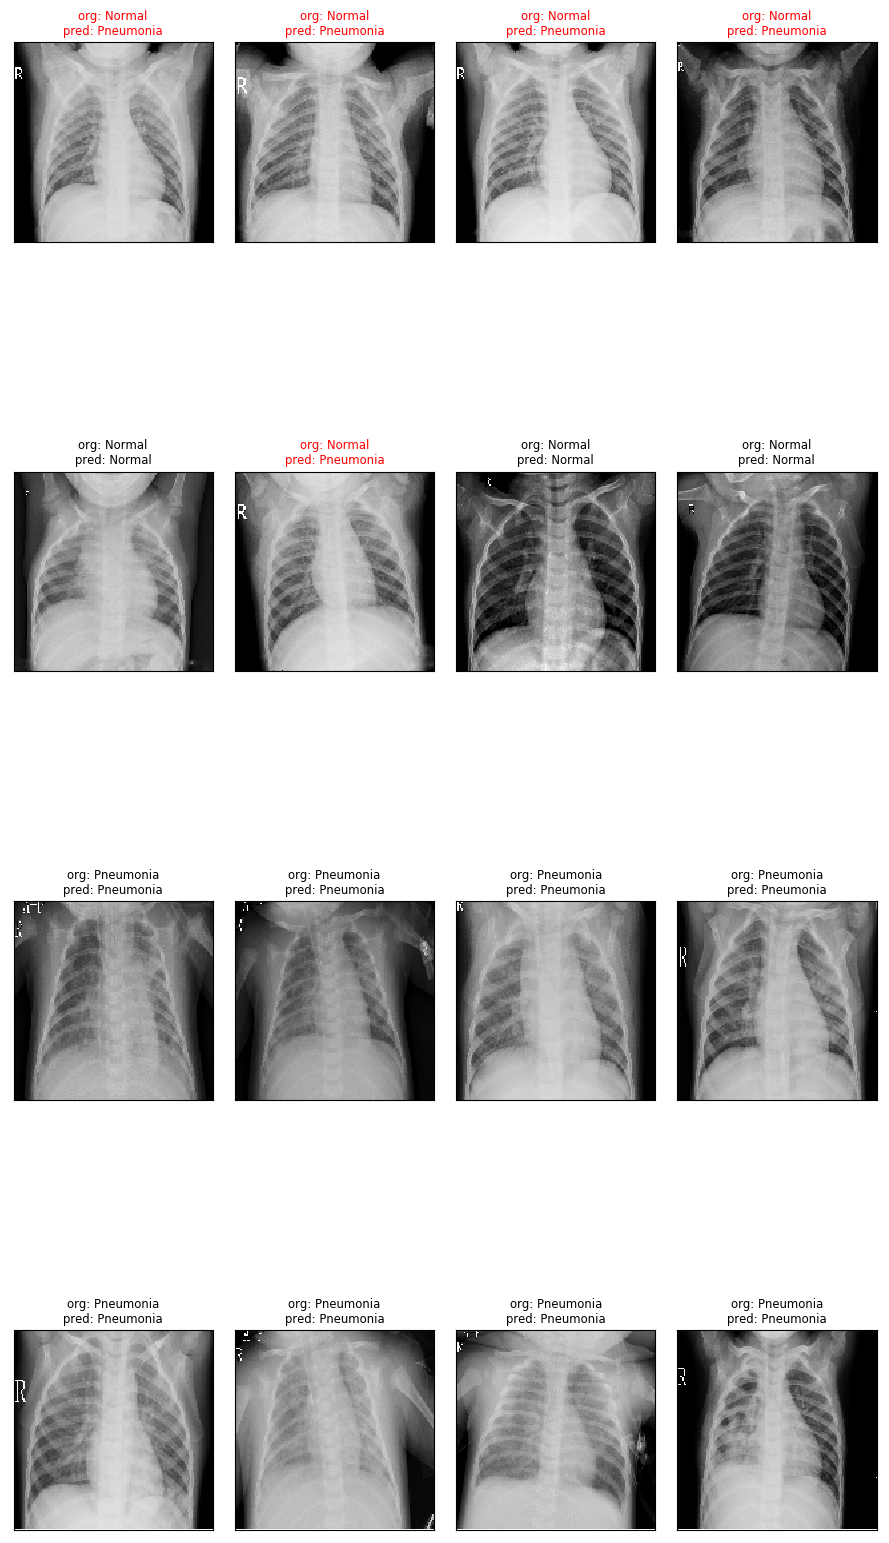

In [66]:


from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

nrows = 4
ncols = 4

# figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

fig, axs = plt.subplots(nrows, ncols, figsize=(9, 18),
                        dpi=100, facecolor='w', edgecolor='k',
                        subplot_kw={'xticks': [], 'yticks': []})

plt.rcParams.update({'axes.titlesize': 'small'})
plt.subplots_adjust(hspace=0.5, wspace=0.3)


for i in range(0, batch_size_t): # how many imgs will show from the 3x3 grid
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(y_img_batch[i])
    plt.xticks([])
    plt.yticks([])
    if y_true_labels[i]==y_pred_labels[i]:
        plt.title("org: " + y_true_labels[i] + "\npred: " + y_pred_labels[i])
    else:
        plt.title("org: " + y_true_labels[i] + "\npred: " + y_pred_labels[i], color='red')
        
    fig.savefig("result", dpi=100)
plt.tight_layout()
plt.show()
